<a href="https://colab.research.google.com/github/lponcec94/PolyWorks/blob/main/semana_7/Semana_7_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro

In [212]:
import numpy as np 
import pandas as pd 
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

https://www.cbioportal.org/study/summary?id=brca_metabric

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lponcec94/PolyWorks/main/semana_7/data/METABRIC_RNA_Mutation.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (678,688,690,692) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Columns: 693 entries, patient_id to siah1_mut
dtypes: float64(498), int64(5), object(190)
memory usage: 10.1+ MB


In [5]:
genes = df.columns.str.startswith('a')

In [6]:
df.loc[:, genes]

,age_at_diagnosis,atm,adam10,adam17,aph1a,aph1b,arrdc1,acvr1,acvr1b,acvr1c,acvr2a,acvr2b,acvrl1,akt1,akt1s1,akt2,apaf1,arl11,atr,aurka,arid1a,arid1b,abcb1,abcb11,abcc1,abcc10,adgra2,afdn,aff2,agmo,agtr2,ahnak,ahnak2,akap9,alk,apc,arid2,arid5b,asxl1,asxl2,ackr3,akr1c1,akr1c2,akr1c3,akr1c4,akt3,ar,ahnak2_mut,ahnak_mut,akap9_mut,arid1a_mut,akt1_mut,atr_mut,arid1b_mut,afdn_mut,alk_mut,adgra2_mut,asxl2_mut,apc_mut,asxl1_mut,arid2_mut,aff2_mut,arid5b_mut,agmo_mut,acvrl1_mut,agtr2_mut,akt2_mut
0,75.65,1.1517,-0.5319,0.8721,0.0020,-0.0098,-1.4652,0.4710,-0.9114,1.8079,-0.9273,-0.7363,2.9004,-1.1280,-0.4574,0.2391,-1.8513,-0.0124,-0.6790,-1.5733,-1.2999,-0.2649,1.6758,-0.4071,-1.0213,-0.1948,2.8014,-0.0004,0.9673,0.3011,-0.8436,1.8227,0.3066,-0.7988,0.4355,0.5815,-1.4317,2.2128,0.6381,-1.4209,1.9395,0.0707,2.7077,1.9038,3.1926,0.8128,-0.3513,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,43.19,-0.2659,-1.2672,-0.2006,1.3135,0.6880,1.3366,0.8386,0.6737,0.7279,1.0905,0.5358,-1.8416,0.0312,-0.1056,0.6519,-0.0742,-0.5111,0.5127,-0.3052,1.9157,-0.9599,-1.1793,-0.0931,0.4261,-0.9788,-0.4462,-1.9854,0.5022,-0.9526,-1.8435,1.6662,1.4577,0.4849,-1.9242,1.3903,2.8106,-0.8652,-0.2488,0.7743,1.4264,1.3935,-0.8240,-0.7537,-0.4241,-0.0711,0.4480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,48.87,-0.0803,2.0364,-1.1229,3.1331,-0.4959,-1.0596,2.2031,-1.7817,0.6777,1.5452,-0.5908,-1.2039,0.9269,0.1185,1.2371,0.1704,0.0771,0.0012,-0.2248,-0.9847,-0.3794,-0.4457,-1.1208,-0.5168,-1.5536,-1.0721,-0.9729,0.0515,0.1109,0.9874,-0.0154,0.8589,1.7950,0.9890,1.5604,2.0526,0.8695,-1.8879,-2.2948,1.1780,-0.1044,-0.3182,-0.5528,-0.3453,1.5564,-0.0780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,47.68,-0.8880,1.4659,-1.0490,2.3645,-1.2458,1.4919,1.0455,-1.2848,-0.4277,2.9200,0.5155,-1.7602,1.2375,-1.0408,-0.1938,0.2536,-0.5253,-0.5074,2.0447,-1.5992,-0.8519,-0.8191,-0.7736,-1.4145,-0.9771,-1.0215,0.4553,-0.2354,0.4003,1.4839,0.3101,-0.6734,1.5143,-0.4072,1.6567,2.6831,-0.2603,-1.6951,-1.7671,2.4700,0.5877,-0.9752,-0.7100,-0.8394,0.7053,-1.7853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,76.97,0.3897,0.9378,-0.2383,0.1228,0.3690,0.9222,-0.7534,0.6626,0.2038,0.4134,-0.0238,-0.8343,-0.9541,-0.8911,2.1021,-0.6142,0.0657,-0.3322,0.5882,0.5634,-0.4830,-0.3463,0.7826,-0.8794,0.0819,-1.5326,-0.4795,1.0052,0.9739,0.8825,-0.7598,0.5698,-0.9309,0.7014,0.3155,1.0845,-0.9843,-0.7672,-1.0214,1.3426,-0.7445,0.6585,-0.0784,0.6210,-0.5713,-0.6808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,43.10,-0.0537,1.0558,-0.3600,0.3603,-0.2154,0.5665,1.2721,-1.4442,0.1315,0.6997,-0.4224,0.4938,-0.1587,-0.8271,0.9639,-0.8220,-1.1148,0.3693,-1.0186,-0.7148,0.5452,-0.5516,-0.1799,-0.8873,-0.9512,0.7184,-0.5100,-0.6253,0.6871,-1.4827,0.5677,0.4147,0.0893,0.7169,1.6777,0.3130,0.5306,-0.9091,-0.8277,0.8164,-0.5432,-0.6065,-0.0449,-0.2106,-0.6005,-0.1945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,T444A,0,0,0,0,0
1900,42.88,0.0028,-0.2088,0.3862,1.0947,-0.7745,-0.7337,-0.1647,0.5551,-0.2195,-1.1642,0.0083,-0.4673,-1.1289,0.6998,2.6758,0.3515,0.2581,0.9428,4.2785,-0.9123,-0.2156,-0.6707,0.4566,0.1139,-0.9134,-1.6993,0.2299,0.0500,-0.2442,0.2092,-1.6626,-1.4153,0.0763,-0.2616,-0.3173,1.6164,-0.7397,-2.1504,0.1371,-0.2112,0.5446,-0.2752,-0.8082,-0.3586,-0.0980,0.0103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1901,62.90,-0.1620,0.1359,0.1968,0.6660,-0.9927,1.0968,-0.2868,1.0343,-0.5989,0.5315,0.1196,-0.8586,-0.1701,0.4348,0.0079,1.1738,-0.0391,-0.2472,1.2295,-0.8813,-0.5266,-0.2917,-0.5769,-0.6231,-0.5393,-1.5763,-0.4724,-1.6766,-1.7719,-0.5571,-0.4341,-1.6884,0.8279,0.7062,-1.0896,1.6294,-0.6234,-2.0445,-1.0178,1.0232,0.3413,-1.1415,-1.5255,-0.9065,-2.2074,1.1062,0,0,0,0,0,0,G223del,0,0,0,0,0,0,0,0,0,0,0,0,0
1902,61.16,1.4531,0.9512,0.2951,1.6504,-0.5905,2.2960,-0.4

In [43]:
df['ahnak2_mut'].unique()

array(['0', 'E5575K', 'E1183*', 'V2061L', 'I5553T', 'E2173Q', 'P3581L',
       'R4512H', 'A196D', 'G2726S', 'A2472V', 'V3631M', 'T3428A',
       'S1341C', 'G812A', 'F3973L', 'A2628V', 'P5615L A3652G', 'L3064M',
       'F5496S', 'E5776G S5639N K4228R', '*5796Sext*46', 'L4206V V2423I',
       'D2030Y D2195Y', 'D4460E', 'E660Q K4060N', 'Q1745E', 'K1657R',
       'V1122M', 'P1508L', 'S4593R', 'L2130R', 'D4251E', 'S4697L',
       'V856L', 'S124G', 'A3652G A3759V M3475I', 'A2834V', 'L395S',
       'A1514V R3490K', 'K1867Q', 'D4065G D4331E', 'G2457R', 'A3335V',
       'D3341N', 'G3903V', 'Q1553H', 'D653N', 'V4167M D1978Y', 'A123T',
       'V1628I', 'G3370R', 'E1678Q', 'D2970E', 'S3651W', 'M1778R',
       'A4230T', 'D2099Y', 'G5068S', 'D3749E', 'S3603R A1115T', 'E816*',
       'V1887E', 'R2794Q', 'P29S', 'V3769M V2352M L2206P', 'A2379P',
       'I3822T', 'V3342M P2651H', 'A878T', 'P3526L', 'V1186L D4331E',
       'D2021N', 'E2008K', 'A74P', 'E1776D A1779T', 'V2061L A1779T',
       'A2043V P204

In [24]:
pam = df.columns.str.startswith('pam')
df.loc[:, pam]

,pam50_+_claudin-low_subtype
0,claudin-low
1,LumA
2,LumB
3,LumB
4,LumB
...,...
1899,LumA
1900,LumB
1901,LumB
1902,LumB


In [7]:
df['integrative_cluster'].unique()

array(['4ER+', '3', '9', '7', '4ER-', '5', '8', '10', '1', '2', '6'],
      dtype=object)

In [17]:
null_col = df.isnull().mean()
null_col[null_col > 0]

type_of_breast_surgery            0.011555
cancer_type_detailed              0.007878
cellularity                       0.028361
er_status_measured_by_ihc         0.015756
neoplasm_histologic_grade         0.037815
tumor_other_histologic_subtype    0.007878
primary_tumor_laterality          0.055672
mutation_count                    0.023634
oncotree_code                     0.007878
3-gene_classifier_subtype         0.107143
tumor_size                        0.010504
tumor_stage                       0.263130
death_from_cancer                 0.000525
dtype: float64

In [14]:
df[df['death_from_cancer'].isnull()]

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
1166,5130,58.61,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Low,0,LumA,3.0,Positve,Positive,3.0,LOSS,Negative,Ductal/NST,0,Post,7,Right,0.0,13.0,4.03,IDC,255.0,0,Positive,1,ER+/HER2- High Prolif,15.0,1.0,NaN,-0.7812,-2.0426,2.0216,0.5926,0.6791,-2.2464,-0.404,0.5511,0.5001,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df['death_from_cancer'].unique()

array(['Living', 'Died of Disease', 'Died of Other Causes', nan],
      dtype=object)

In [21]:
df['death_from_cancer'].value_counts()

Living                  801
Died of Disease         622
Died of Other Causes    480
Name: death_from_cancer, dtype: int64

In [20]:
df[df['tumor_stage'].isnull()].head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
66,144,79.73,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,8,Left,6.0,5.0,6.052,IDC,152.066667,0,Positive,1,ER+/HER2- Low Prolif,26.0,NaN,Died of Disease,-0.0968,-0.2425,0.2435,-0.2576,0.9099,-0.9825,-0.5542,-0.7261,-1.2632,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,163,84.73,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,Basal,1.0,Negative,Negative,3.0,NEUTRAL,Negative,Ductal/NST,0,Post,10,NaN,1.0,14.0,5.054,IDC,98.100000,0,Negative,0,NaN,27.0,NaN,Died of Other Causes,-1.4376,-0.5518,1.4721,-2.1597,-2.0791,-0.0595,-0.0898,2.4835,0.5430,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,193,51.54,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumB,1.0,Positve,Positive,3.0,GAIN,Negative,Ductal/NST,0,Post,3,Left,7.0,1.0,6.038,IDC,19.000000,1,Positive,0,ER+/HER2- High Prolif,19.0,NaN,Living,0.5385,1.7460,-0.5740,-0.0599,0.3196,0.2234,-0.0135,0.0475,0.0326,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
115,207,48.13,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,0,LumA,1.0,Positve,Positive,2.0,GAIN,Negative,Mixed,1,Pre,8,Left,2.0,6.0,4.056,MDLC,173.633333,1,Positive,0,ER+/HER2- Low Prolif,28.0,NaN,Living,-0.0400,-0.3917,0.3665,0.2334,0.6502,0.3380,0.3792,0.2530,1.2895,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
117,211,42.95,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,claudin-low,1.0,Positve,Negative,3.0,NEUTRAL,Negative,Ductal/NST,0,Pre,9,Left,13.0,2.0,6.080,IDC,44.800000,0,Negative,0,ER+/HER2- Low Prolif,40.0,NaN,Died of Disease,-0.5069,1.8424,-1.0926,-0.5220,-1.9645,0.0068,-0.1169,-0.4795,-0.1075,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
df['tumor_stage'].unique()

array([ 2.,  1.,  4.,  3., nan,  0.])

In [22]:
df['pam50_+_claudin-low_subtype'].unique()

array(['claudin-low', 'LumA', 'LumB', 'Her2', 'Normal', 'Basal', 'NC'],
      dtype=object)

In [25]:
df['integrative_cluster'].value_counts()

8       289
3       282
4ER+    244
10      219
5       184
7       182
9       142
1       132
6        84
4ER-     74
2        72
Name: integrative_cluster, dtype: int64

In [26]:
gene = df.columns.str.startswith('fox')
df.loc[:, gene]

,foxo1,foxo3,foxp1,foxo3_mut,foxp1_mut,foxo1_mut
0,2.5507,0.9213,-0.3045,0,0,0
1,-0.7180,-1.6144,-0.1447,A499Gfs*16,0,0
2,-0.4464,-1.2823,2.0214,0,0,0
3,0.4124,-1.2511,1.5297,0,0,0
4,-1.1731,-1.5713,0.6269,0,0,0
...,...,...,...,...,...,...
1899,-0.0958,-0.5003,0.2773,0,0,0
1900,-0.9884,-1.7294,-0.1714,0,0,0
1901,-0.4641,-1.4762,0.6486,S173F,0,0
1902,-0.6700,-1.3523,-0.8218,R266H,0,0


#### Genetic mutation columns

In [44]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
mutation_features = df.columns[31:520]
# mutation_features

In [54]:
mutation_columns = df[mutation_features]

In [55]:
mutation_columns.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,stk11,bard1,mlh1,msh2,msh6,pms2,epcam,rad51c,rad51d,rad50,rb1,rbl1,rbl2,ccna1,ccnb1,cdk1,ccne1,cdk2,cdc25a,ccnd1,cdk4,cdk6,ccnd2,cdkn2a,cdkn2b,myc,cdkn1a,cdkn1b,e2f1,e2f2,...,hsd17b1,hsd17b10,hsd17b11,hsd17b12,hsd17b13,hsd17b14,hsd17b2,hsd17b3,hsd17b4,hsd17b6,hsd17b7,hsd17b8,hsd3b1,hsd3b2,hsd3b7,mecom,met,ncoa2,nrip1,pik3r3,prkci,prkd1,ran,rdh5,sdc4,serpini1,shbg,slc29a1,sox9,spry2,srd5a1,srd5a2,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,-0.4294,-1.1201,-0.4844,-0.7483,-1.6660,-0.1250,-0.3721,-0.6508,-0.1278,1.7330,-0.2770,-1.0673,0.0615,0.1034,-1.6635,-2.0649,-1.3388,-0.6208,-1.7309,-0.8059,-1.1037,0.0744,1.4313,-0.5785,1.2180,2.5602,2.3152,-0.2487,0.1601,-1.8799,...,0.2581,-0.0487,1.6822,1.7409,8.8731,-0.6494,0.4931,1.0860,0.2650,-1.8717,-1.7598,0.5445,0.5018,0.7345,-0.9899,1.1211,0.1674,-0.3421,0.4076,-0.6199,-1.2582,1.8407,0.6630,5.0109,0.5008,0.0052,-0.4357,0.9859,1.2386,2.8796,-1.1877,-0.0194,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,0.5120,0.4390,1.2266,0.7612,0.1821,1.0104,0.5600,-0.4018,-0.2909,0.7440,-1.7488,0.4602,0.7835,-0.2690,-0.2715,0.3895,-0.6273,0.1813,-1.2643,1.1057,0.4108,-0.6040,0.0546,0.2754,-0.0952,0.7248,0.4389,1.8759,-1.8984,-0.3327,...,-0.4467,-0.0693,-0.7837,0.0117,1.5355,0.7590,-0.5652,0.0623,-1.2693,1.0729,1.1973,-2.9847,-1.9199,0.6433,-0.4801,-1.8732,-1.0840,-0.7220,-0.1878,-1.0623,1.7653,0.3500,-0.2505,-0.6337,-0.1047,0.0222,-0.2938,-1.0821,-1.3206,0.2446,-0.4412,0.4534,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,0.2362,-0.1721,-1.7910,3.0955,0.6608,2.6127,2.5553,-0.0391,-0.4421,1.4528,1.4142,0.3143,-0.0662,-0.5558,0.6967,1.2949,-0.1245,-0.1109,-0.3923,-1.2747,-0.5312,0.2585,0.8958,-0.2270,1.1899,-0.7207,1.4829,3.0696,2.2248,-1.4859,...,-0.6253,0.0082,1.6822,0.8981,-0.0943,1.1599,0.1442,0.1493,0.1117,1.6262,2.2685,-0.9910,0.1767,-0.9128,-0.0006,0.7079,-0.7401,1.2279,-0.2882,-0.1727,1.1257,0.8306,0.2707,-0.7554,-0.3559,-0.7735,-0.1387,-0.9122,1.2552,0.4593,-0.5381,0.0668,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,1.0078,-0.4010,-1.3905,4.8798,0.0615,2.9414,4.1161,-0.3098,-1.3470,1.2102,1.5345,-0.6347,0.7279,0.0219,1.8801,0.0476,-0.6651,-1.4457,-0.3827,-0.4537,-1.5248,0.3689,1.1455,0.0432,1.0868,-0.5237,0.2119,3.4617,0.4610,-1.5404,...,4.8189,0.0960,1.4099,-0.6707,-0.3589,-0.8998,-0.5063,0.2546,-0.6586,1.7024,0.1617,1.4208,0.1320,1.8754,-1.8850,0.1474,0.5097,-0.0393,-0.2049,-0.3290,3.2140,2.4162,1.7962,-1.2505,-0.1742,-0.2858,-0.7305,-1.0178,-0.7887,1.3361,-0.5630,-0.7078,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,-0.2961,0.6320,-0.3582,0.3032,0.8747,0.6323,0.3349,-0.2652,-0.1541,-0.7631,1.0158,1.8996,0.6618,-0.7454,0.2862,1.1035,-1.0514,1.5423,1.2169,0.1169,1.7648,0.8892,-1.0195,0.3664,0.7145,0.5223,1.5638,0.1562,-0.2666,0.4509,...,-0.0590,0.2796,0.0493,-0.7074,0.0696,-0.4491,-0.5634,-0.7627,-0.7051,0.6065,-0.0141,0.7040,-2.0938,-0.1260,-0.6658,0.6451,0.5497,4.1999,0.2832,0.4018,0.1308,-0.5351,1.2930,1.2971,-0.8885,-0.5545,0.0266,0.5328,0.1858,-0.3201,-0.5845,-0.3544,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223


#### Clinical columns

In [56]:
clinical_features = df.columns[0:31]
clinical_columns = df[clinical_features]

In [57]:
clinical_columns.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


#### Messenger RNA columns

In [59]:
mRna_features = df.columns[520:] 
mRna_columns = df[mRna_features]

In [60]:
mRna_columns.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,H178P,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,H1047R,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,L1463P,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,E542K,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,S241F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,F2321Y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Preprocessing

Para poder utilizar el AutoEncoder requerimos tener nuestras columnas en datos numéricos. Por lo tanto, vamos a realizar el preprocesamiento necesario para cada tipo de característica en el dataset. 

Las columnas de mutation genética ya se encuentran estandarizadas, así que no las transformaremos. Sólo es necesario revisar nulos y tratarlos. 

In [65]:
# En el caso de las columnas sobre mutationes en genes no tenemos datos nulos.
null_col = mutation_columns.isnull().mean()
null_col[null_col > 0]

Series([], dtype: float64)



---



---



##### Clinical Features

In [66]:
clinical_columns.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,er_status,neoplasm_histologic_grade,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,hormone_therapy,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Post,4ER+,Right,10.0,NaN,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Ductal/NST,1,Pre,4ER+,Right,0.0,2.0,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Ductal/NST,1,Pre,3,Right,1.0,2.0,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,Positive,2.0,NEUTRAL,Negative,Mixed,1,Pre,9,Right,3.0,1.0,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,Positive,3.0,NEUTRAL,Negative,Mixed,1,Post,9,Right,8.0,2.0,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [68]:
clinical_cat_col = clinical_columns.select_dtypes(include='O')
clinical_cat_col.head()

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,oncotree_code,pr_status,3-gene_classifier_subtype,death_from_cancer
0,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,claudin-low,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Post,4ER+,Right,IDC,Negative,ER-/HER2-,Living
1,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Pre,4ER+,Right,IDC,Positive,ER+/HER2- High Prolif,Living
2,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Ductal/NST,Pre,3,Right,IDC,Positive,NaN,Died of Disease
3,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,Pre,9,Right,MDLC,Positive,NaN,Living
4,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,Positve,Positive,NEUTRAL,Negative,Mixed,Post,9,Right,MDLC,Positive,ER+/HER2- High Prolif,Died of Disease


In [76]:
for col in clinical_cat_col.columns:
  print(f'Unique Categories for {col}:', clinical_cat_col[col].unique())
  print('NaN Values:', clinical_cat_col[col].isna().sum())
  print()

Unique Categories for type_of_breast_surgery: ['MASTECTOMY' 'BREAST CONSERVING' nan]
NaN Values: 22

Unique Categories for cancer_type: ['Breast Cancer' 'Breast Sarcoma']
NaN Values: 0

Unique Categories for cancer_type_detailed: ['Breast Invasive Ductal Carcinoma'
 'Breast Mixed Ductal and Lobular Carcinoma'
 'Breast Invasive Lobular Carcinoma'
 'Breast Invasive Mixed Mucinous Carcinoma' 'Breast' nan
 'Metaplastic Breast Cancer']
NaN Values: 15

Unique Categories for cellularity: [nan 'High' 'Moderate' 'Low']
NaN Values: 54

Unique Categories for pam50_+_claudin-low_subtype: ['claudin-low' 'LumA' 'LumB' 'Her2' 'Normal' 'Basal' 'NC']
NaN Values: 0

Unique Categories for er_status_measured_by_ihc: ['Positve' 'Negative' nan]
NaN Values: 30

Unique Categories for er_status: ['Positive' 'Negative']
NaN Values: 0

Unique Categories for her2_status_measured_by_snp6: ['NEUTRAL' 'LOSS' 'GAIN' 'UNDEF']
NaN Values: 0

Unique Categories for her2_status: ['Negative' 'Positive']
NaN Values: 0

Uniq

In [80]:
to_drop = clinical_cat_col[clinical_cat_col['death_from_cancer'].isnull()].index
to_drop

Int64Index([1166], dtype='int64')

In [77]:
clinical_cat_col.shape

(1904, 17)

In [79]:
clinical_cat_col.dropna().shape

(1519, 17)

In [82]:
null_cat = clinical_cat_col.isnull().sum()
name_null_cat = null_cat[null_cat > 1].index
name_null_cat

Index(['type_of_breast_surgery', 'cancer_type_detailed', 'cellularity',
       'er_status_measured_by_ihc', 'tumor_other_histologic_subtype',
       'primary_tumor_laterality', 'oncotree_code',
       '3-gene_classifier_subtype'],
      dtype='object')

type_of_breast_surgery


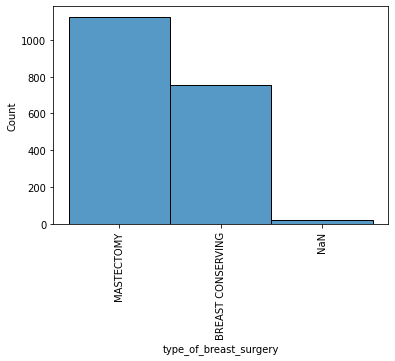

cancer_type_detailed


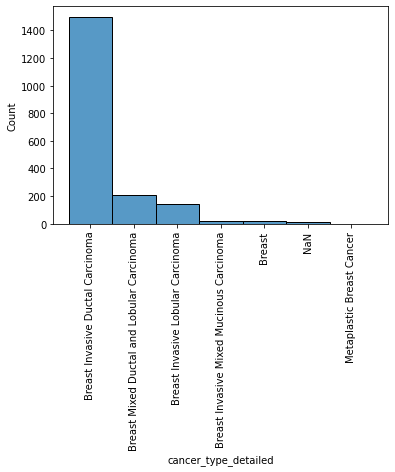

cellularity


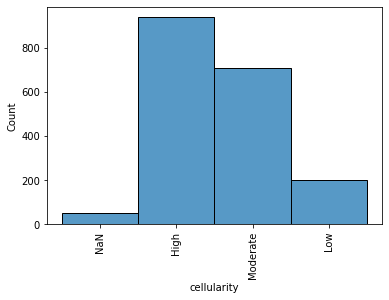

er_status_measured_by_ihc


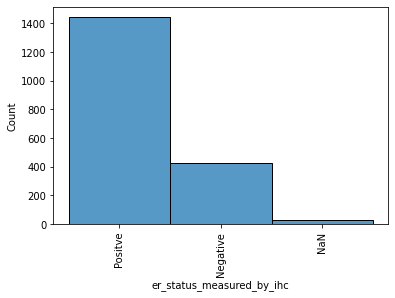

tumor_other_histologic_subtype


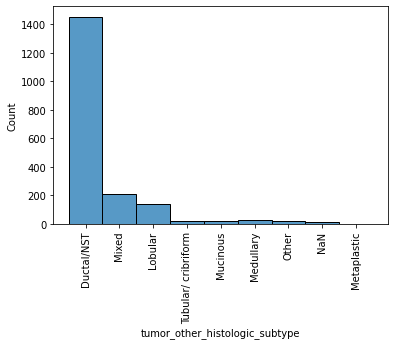

primary_tumor_laterality


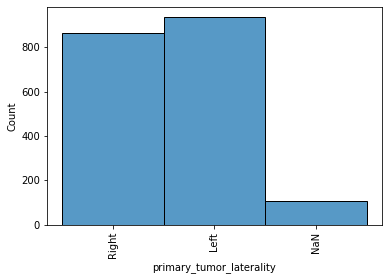

oncotree_code


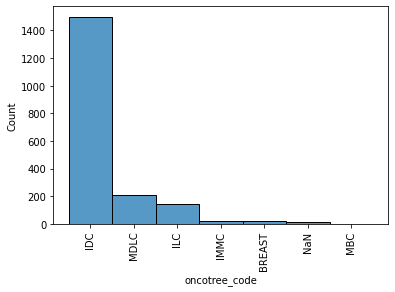

3-gene_classifier_subtype


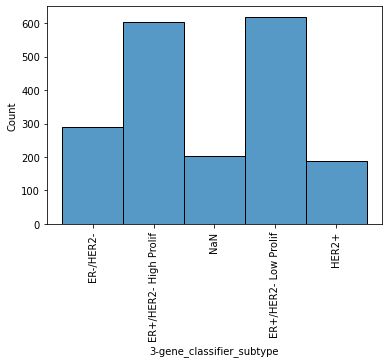

In [89]:
for col in name_null_cat:
  print(col)
  sns.histplot(clinical_cat_col[col].fillna('NaN'))
  plt.xticks(rotation=90)
  plt.show();

In [114]:
reg_to_drop = list()
for col in name_null_cat:
  null_count = clinical_cat_col[col].isnull().sum()
  if null_count < 50: 
    reg_to_drop += clinical_cat_col[clinical_cat_col[col].isnull()].index.tolist()
  else:
    clinical_cat_col.loc[clinical_cat_col[col].isnull(), col] = stats.mode(clinical_cat_col[col])[0]

In [115]:
print(reg_to_drop)

[36, 152, 160, 166, 170, 171, 189, 204, 218, 224, 357, 375, 417, 457, 463, 476, 799, 1000, 1047, 1164, 1169, 1195, 206, 210, 352, 357, 1194, 1205, 1316, 1325, 1341, 1441, 1698, 1723, 1747, 1782, 1857, 131, 132, 134, 141, 157, 159, 170, 208, 476, 498, 841, 946, 980, 994, 1010, 1032, 1033, 1035, 1036, 1070, 1183, 1192, 1241, 1773, 1775, 1779, 1780, 1791, 1792, 1819, 206, 210, 352, 357, 1194, 1205, 1316, 1325, 1341, 1441, 1698, 1723, 1747, 1782, 1857, 206, 210, 352, 357, 1194, 1205, 1316, 1325, 1341, 1441, 1698, 1723, 1747, 1782, 1857]


In [116]:
len(reg_to_drop)

97

In [117]:
clinical_cat_col['cellularity'].isnull().sum()

0

In [118]:
reg_to_drop = reg_to_drop + to_drop.tolist()
len(reg_to_drop)

98

In [120]:
clinical_cat_clean = clinical_cat_col.drop(index=reg_to_drop)
clinical_cat_clean.shape

(1839, 17)

In [125]:
cat_1, cat_2 = clinical_cat_clean['type_of_breast_surgery'].unique()

In [126]:
cat_1, cat_2

('MASTECTOMY', 'BREAST CONSERVING')

In [128]:
dummies = list()
for col in clinical_cat_clean.columns:
  if clinical_cat_clean[col].unique().shape[0] == 2:
    cat_1, cat_2 = clinical_cat_clean[col].unique()
    clinical_cat_clean[col] = clinical_cat_clean[col].apply(lambda x: 1 if x == cat_1 else 0)
  else:
    dummies.append(pd.get_dummies(clinical_cat_clean[col]))

In [132]:
df_dummies = pd.concat(dummies, axis=1)

In [133]:
df_dummies.head()

,Breast Cancer,Breast,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Breast Invasive Mixed Mucinous Carcinoma,Breast Mixed Ductal and Lobular Carcinoma,Metaplastic Breast Cancer,High,Low,Moderate,Basal,Her2,LumA,LumB,NC,Normal,claudin-low,GAIN,LOSS,NEUTRAL,UNDEF,Ductal/NST,Lobular,Medullary,Metaplastic,Mixed,Mucinous,Other,Tubular/ cribriform,1,10,2,3,4ER+,4ER-,5,6,7,8,9,BREAST,IDC,ILC,IMMC,MBC,MDLC,ER+/HER2- High Prolif,ER+/HER2- Low Prolif,ER-/HER2-,HER2+,Died of Disease,Died of Other Causes,Living
0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0


In [134]:
clinical_cat_clean.head()

,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,pam50_+_claudin-low_subtype,er_status_measured_by_ihc,er_status,her2_status_measured_by_snp6,her2_status,tumor_other_histologic_subtype,inferred_menopausal_state,integrative_cluster,primary_tumor_laterality,oncotree_code,pr_status,3-gene_classifier_subtype,death_from_cancer
0,1,Breast Cancer,Breast Invasive Ductal Carcinoma,High,claudin-low,1,1,NEUTRAL,1,Ductal/NST,1,4ER+,1,IDC,1,ER-/HER2-,Living
1,0,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumA,1,1,NEUTRAL,1,Ductal/NST,0,4ER+,1,IDC,0,ER+/HER2- High Prolif,Living
2,1,Breast Cancer,Breast Invasive Ductal Carcinoma,High,LumB,1,1,NEUTRAL,1,Ductal/NST,0,3,1,IDC,0,ER+/HER2- Low Prolif,Died of Disease
3,1,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,LumB,1,1,NEUTRAL,1,Mixed,0,9,1,MDLC,0,ER+/HER2- Low Prolif,Living
4,1,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,LumB,1,1,NEUTRAL,1,Mixed,1,9,1,MDLC,0,ER+/HER2- High Prolif,Died of Disease


In [143]:
clinical_cat_clean.shape

(1839, 17)

In [162]:
clinical_to_num = pd.concat([clinical_cat_clean, df_dummies], axis=1)._get_numeric_data()
clinical_to_num.head()

,type_of_breast_surgery,er_status_measured_by_ihc,er_status,her2_status,inferred_menopausal_state,primary_tumor_laterality,pr_status,Breast Cancer,Breast,Breast Invasive Ductal Carcinoma,Breast Invasive Lobular Carcinoma,Breast Invasive Mixed Mucinous Carcinoma,Breast Mixed Ductal and Lobular Carcinoma,Metaplastic Breast Cancer,High,Low,Moderate,Basal,Her2,LumA,LumB,NC,Normal,claudin-low,GAIN,LOSS,NEUTRAL,UNDEF,Ductal/NST,Lobular,Medullary,Metaplastic,Mixed,Mucinous,Other,Tubular/ cribriform,1,10,2,3,4ER+,4ER-,5,6,7,8,9,BREAST,IDC,ILC,IMMC,MBC,MDLC,ER+/HER2- High Prolif,ER+/HER2- Low Prolif,ER-/HER2-,HER2+,Died of Disease,Died of Other Causes,Living
0,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,0,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
2,1,1,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
3,1,1,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
4,1,1,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0


In [163]:
clinical_to_num.shape

(1839, 60)

In [164]:
clinical_num_col = clinical_columns._get_numeric_data()
clinical_num_col.head()

,patient_id,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,tumor_stage
0,0,75.65,0,1.0,3.0,1,10.0,NaN,6.044,140.500000,1,1,22.0,2.0
1,2,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,1,10.0,1.0
2,5,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,0,15.0,2.0
3,6,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,1,25.0,2.0
4,8,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,0,1,40.0,2.0


In [165]:
clinical_num_col.shape

(1904, 14)

In [166]:
clinical_num_col.isnull().sum()

patient_id                         0
age_at_diagnosis                   0
chemotherapy                       0
cohort                             0
neoplasm_histologic_grade         72
hormone_therapy                    0
lymph_nodes_examined_positive      0
mutation_count                    45
nottingham_prognostic_index        0
overall_survival_months            0
overall_survival                   0
radio_therapy                      0
tumor_size                        20
tumor_stage                      501
dtype: int64

In [167]:
clinical_num_col.drop(columns='tumor_stage', inplace=True)

In [168]:
clinical_num_col.dropna(inplace=True)
clinical_num_col.shape

(1770, 13)

In [172]:
clinical_clean = pd.concat([clinical_num_col, clinical_to_num], axis=1)
clinical_clean.shape

(1890, 73)

In [173]:
clinical_clean.dropna(inplace=True)
clinical_clean.shape

(1719, 73)

##### mRNA Features

In [174]:
for col in mRna_columns.columns:
  mRna_columns[col] = mRna_columns[col].apply(lambda x: 0 if x == '0' else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
mRna_columns.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,cdh1_mut,dnah2_mut,kmt2d_mut,ush2a_mut,ryr2_mut,dnah5_mut,herc2_mut,pde4dip_mut,akap9_mut,tg_mut,birc6_mut,utrn_mut,tbx3_mut,col6a3_mut,arid1a_mut,lama2_mut,notch1_mut,cbfb_mut,ncor2_mut,col12a1_mut,col22a1_mut,pten_mut,akt1_mut,atr_mut,thada_mut,ncor1_mut,stab2_mut,myh9_mut,runx1_mut,nf1_mut,...,gpr32_mut,kras_mut,nf2_mut,chek2_mut,ldlrap1_mut,clrn2_mut,acvrl1_mut,agtr2_mut,cdkn2a_mut,ctnna1_mut,magea8_mut,prr16_mut,dtwd2_mut,akt2_mut,braf_mut,foxo1_mut,nt5e_mut,ccnd3_mut,nr3c1_mut,prkg1_mut,tbl1xr1_mut,frmd3_mut,smad2_mut,sgcd_mut,spaca1_mut,rasgef1b_mut,hist1h2bc_mut,nr2f1_mut,klrg1_mut,mbl2_mut,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


#### DF to use

In [176]:
df_transform = pd.concat([mutation_columns, clinical_clean, mRna_columns], axis=1)
df_transform = df_transform.dropna()
df_transform.shape

(1719, 735)

#### Divide Data

In [198]:
X = df_transform.drop(columns=['patient_id','Died of Disease', 'Died of Other Causes', 'Living', 'overall_survival'])
y = df_transform['overall_survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

### Autoencoder

In [199]:
n_features = X.shape[1]
n_features

730

In [200]:
encoding_dim = 40

In [201]:
input = layers.Input(shape=(n_features, ))

In [202]:
encoded = layers.Dense(encoding_dim, activation='sigmoid')(input)

In [203]:
decoded = layers.Dense(n_features, activation='sigmoid')(encoded)

In [208]:
# maps an input to its reconstruction
autoencoder = Model(inputs=input, outputs=decoded)

In [209]:
encoder = Model(input, encoded)

In [210]:
autoencoder.compile(loss='mse', optimizer=optimizers.SGD(learning_rate=0.01))

In [211]:
autoencoder.fit(X_train, X_train, epochs=200, batch_size=32, shuffle=True, verbose=1)

Epoch 1/200
43/43 [==============================] - 1s 4ms/step - loss: 36.8581
Epoch 2/200
43/43 [==============================] - 0s 3ms/step - loss: 36.8038
Epoch 3/200
43/43 [==============================] - 0s 3ms/step - loss: 36.7692
Epoch 4/200
43/43 [==============================] - 0s 3ms/step - loss: 36.7449
Epoch 5/200
43/43 [==============================] - 0s 3ms/step - loss: 36.7274
Epoch 6/200
43/43 [==============================] - 0s 4ms/step - loss: 36.7143
Epoch 7/200
43/43 [==============================] - 0s 4ms/step - loss: 36.7038
Epoch 8/200
43/43 [==============================] - 0s 4ms/step - loss: 36.6951
Epoch 9/200
43/43 [==============================] - 0s 3ms/step - loss: 36.6876
Epoch 10/200
43/43 [==============================] - 0s 3ms/step - loss: 36.6812
Epoch 11/200
43/43 [==============================] - 0s 3ms/step - loss: 36.6757
Epoch 12/200
43/43 [==============================] - 0s 3ms/step - loss: 36.6710
Epoch 13/200
43/43 [=====

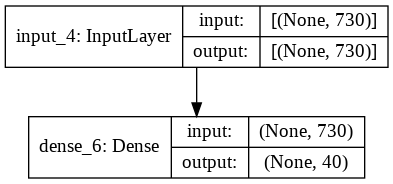

In [213]:
plot_model(encoder, show_shapes=True)

In [214]:
X_train_encode = encoder.predict(X_train)
X_test_encode = encoder.predict(X_test)

In [215]:
X_train_encode

array([[2.0666808e-02, 3.1131506e-04, 6.1925054e-03, ..., 9.9991727e-01,
        9.9999946e-01, 9.9995637e-01],
       [1.8666089e-03, 1.5622578e-05, 2.6763678e-03, ..., 9.9999577e-01,
        1.0000000e+00, 9.9998522e-01],
       [1.4816105e-02, 3.6474596e-06, 5.0074458e-03, ..., 1.0000000e+00,
        1.0000000e+00, 9.9999690e-01],
       ...,
       [9.4127357e-03, 3.2607090e-06, 4.9095452e-03, ..., 9.9999940e-01,
        1.0000000e+00, 9.9997044e-01],
       [4.0122867e-04, 2.2734204e-07, 5.5567622e-03, ..., 1.0000000e+00,
        1.0000000e+00, 9.9999976e-01],
       [5.9419012e-01, 9.2236660e-05, 4.3863267e-01, ..., 9.9996245e-01,
        9.9998713e-01, 9.9992836e-01]], dtype=float32)

### AdaBoost Classifier

In [222]:
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [223]:
y_pred_train = clf.predict(X_train)

In [225]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       804
         1.0       0.94      0.92      0.93       571

    accuracy                           0.94      1375
   macro avg       0.94      0.94      0.94      1375
weighted avg       0.94      0.94      0.94      1375



In [226]:
y_pred_test = clf.predict(X_test)

In [228]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77       193
         1.0       0.71      0.67      0.69       151

    accuracy                           0.74       344
   macro avg       0.73      0.73      0.73       344
weighted avg       0.73      0.74      0.73       344



#### Classification with Encoder

In [216]:
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_encode, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=42)

In [217]:
y_pred_train = clf.predict(X_train_encode)

In [219]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84       804
         1.0       0.77      0.78      0.77       571

    accuracy                           0.81      1375
   macro avg       0.80      0.80      0.80      1375
weighted avg       0.81      0.81      0.81      1375



In [220]:
y_pred_test = clf.predict(X_test_encode)

In [221]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.77       193
         1.0       0.71      0.67      0.69       151

    accuracy                           0.73       344
   macro avg       0.73      0.73      0.73       344
weighted avg       0.73      0.73      0.73       344

